In [1]:
%reload_ext autoreload
%autoreload 2

from scipy.io import loadmat
import numpy as np
from murray import log_pstar, slice_sample, dumb_metropolis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = loadmat('mcmc/astro_data.mat')

In [3]:
# load dataset into easier variable names
X, V = dataset['xx'], dataset['vv']

In [4]:
# call log_pstar with the parameters given
def my_func(params):
    return log_pstar(*params, X, V)

In [5]:
# some random numbers i just picked, just to start with
log_omega = 1
mm = 1
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

# Step size influence

Here we examine what influence the step size has on the Metropolis algorithm. I tried three different values to see what they would look like, and got different values for the parameters as well as a different acceptance rate for each of them.

g:\git\bayesian-ml\hw3files\murray.py:54: RuntimeWarning: divide by zero encountered in log
  + (1 - pie) * norm(log_A, mu2, sigma2)))


0.018


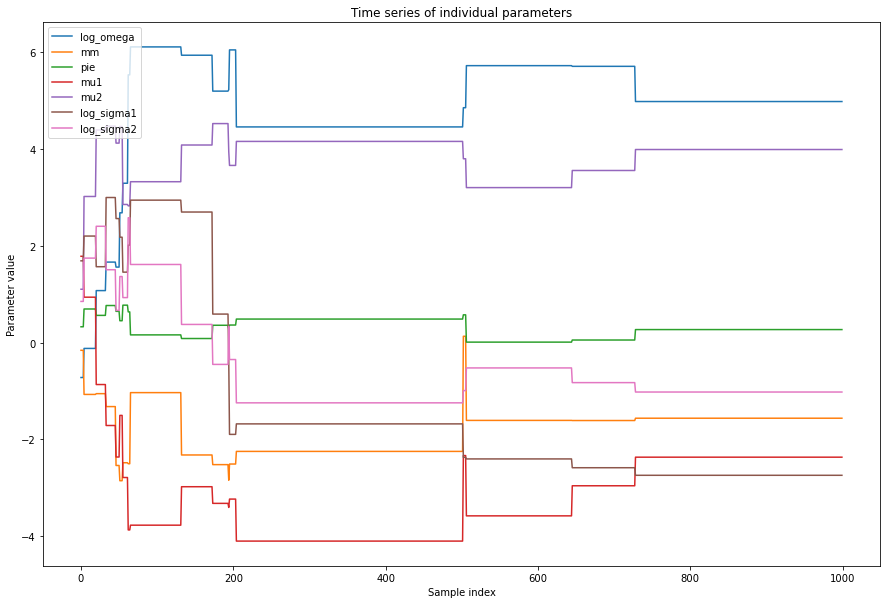

In [6]:
samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           1,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.04


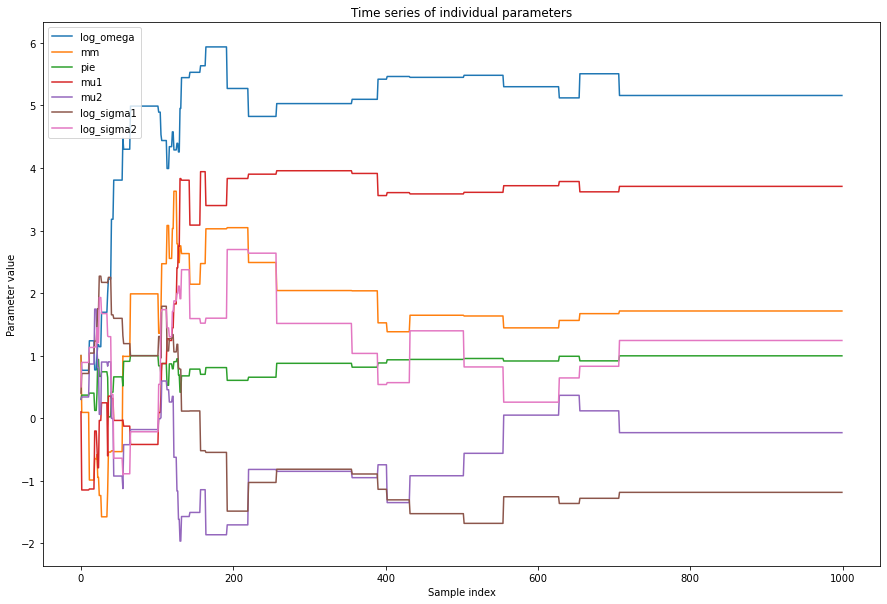

In [7]:
samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.5,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.622


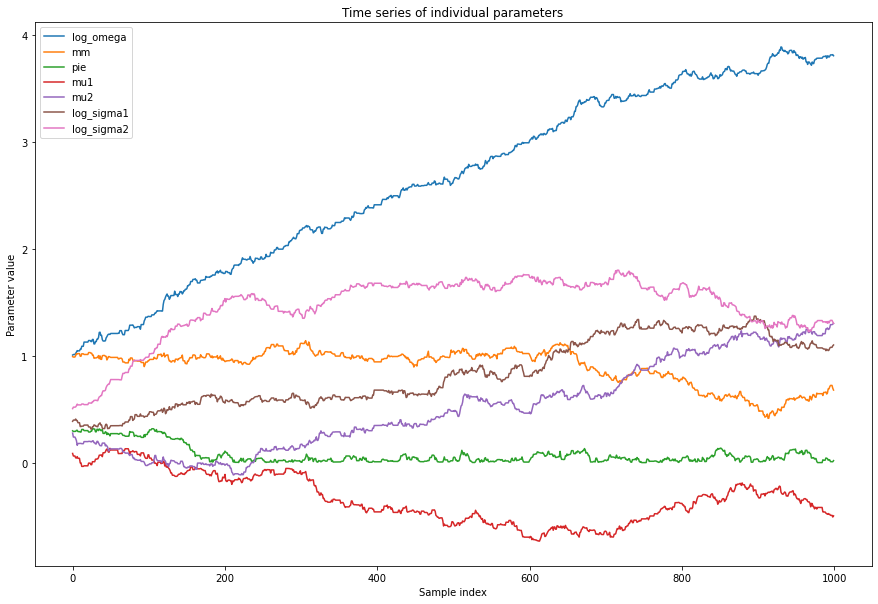

In [8]:
samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

I also wanted to examine interactions between any two given variables. This can be seen below (albeit it's not very clear). I was able to gather some insights though:

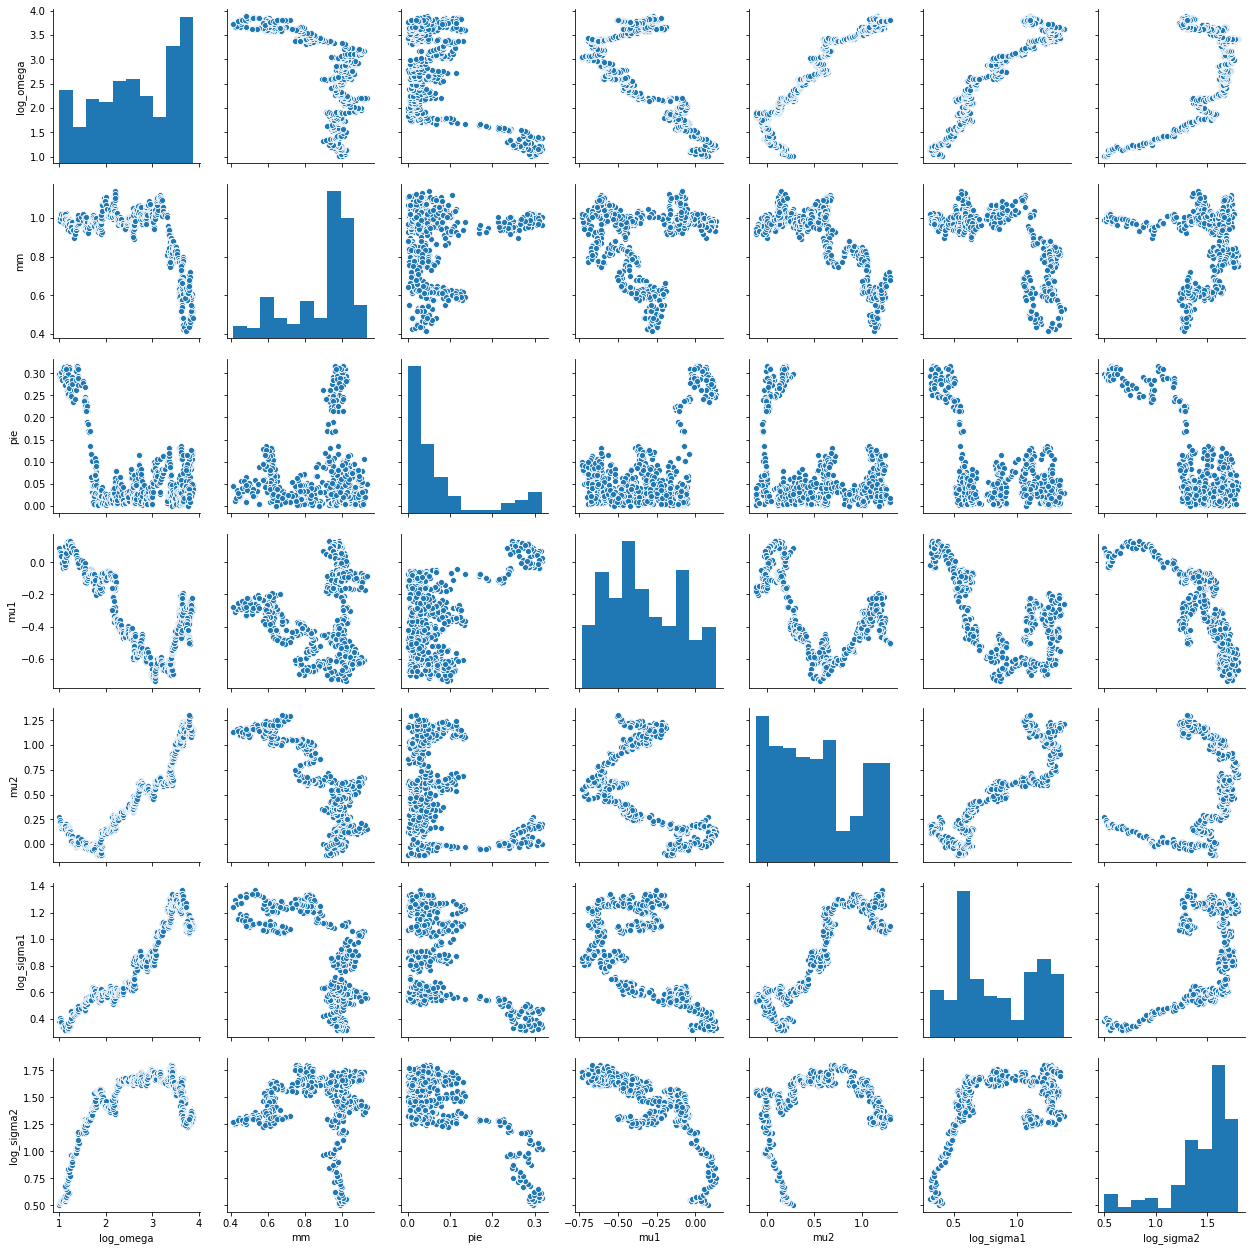

In [9]:
sns.pairplot(df.drop(['sample_idx'], axis=1))

### General observations

- pie likes to collapse to either 1 or 0
- mu1 and mu2 are inversely correlated (makes sense; if the model is preferring a single-Gaussian distribution instead of a mixture model, then either mu1 or mu2 play a role, but the other doesn't)
- there seems to be some inverse correlation between log_sigma1 and log_sigma2 (like mu1/mu2) but it's not very good
- there are also interactions between the mus/sigmas
- burn-in period seems required for metropolis, we never really converged

0.4985


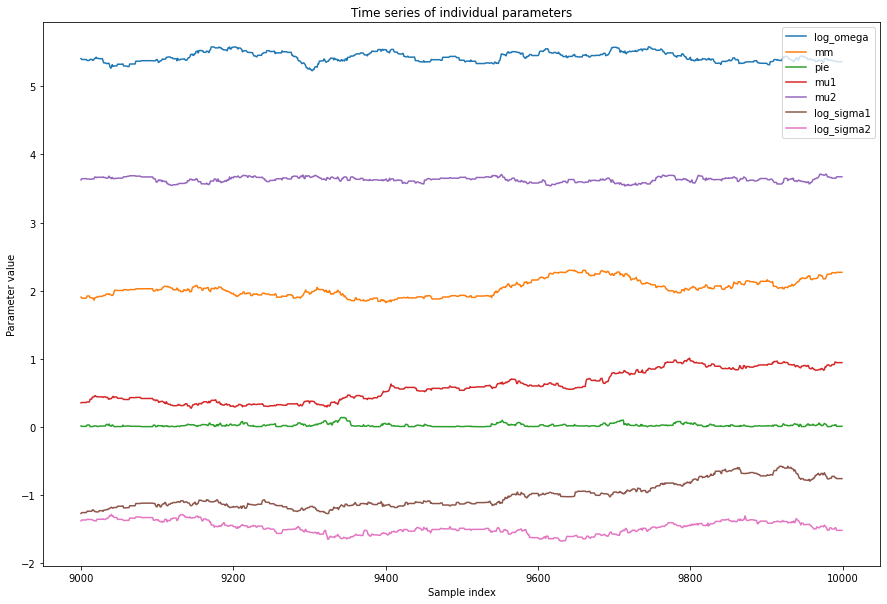

In [10]:
samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           10000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df[-1000:], label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

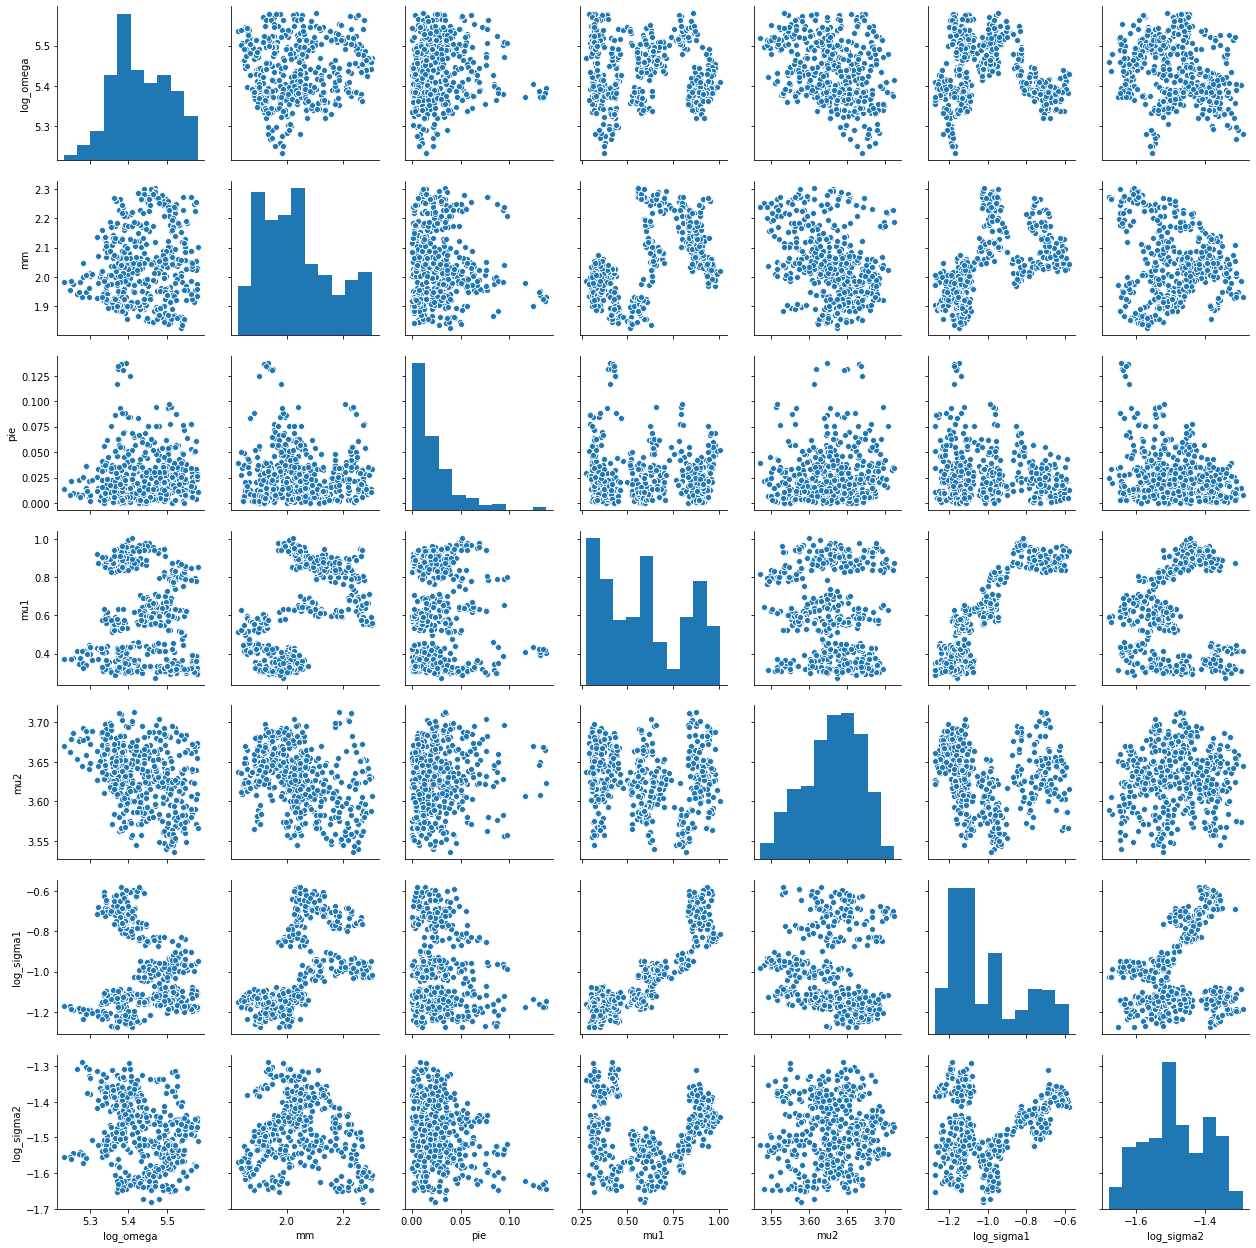

In [11]:
sns.pairplot(df.drop(['sample_idx'], axis=1)[df['sample_idx'] >= 9000])

# Initialization

What difference do different initialization procedures make? This must be looked at for both Metropolis and slice sampling.

## Metropolis

0.623


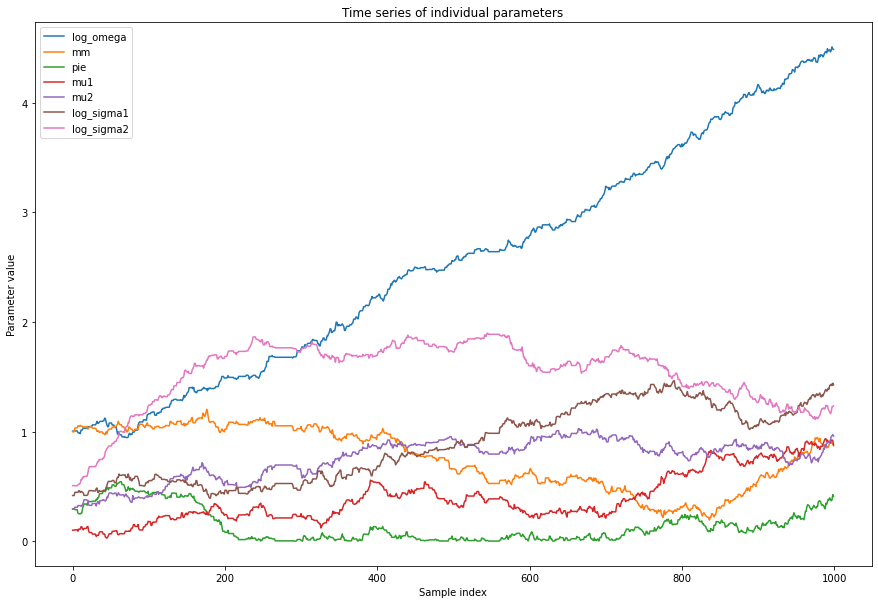

In [12]:
# randomly picked parameters
log_omega = 1
mm = 1
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.68


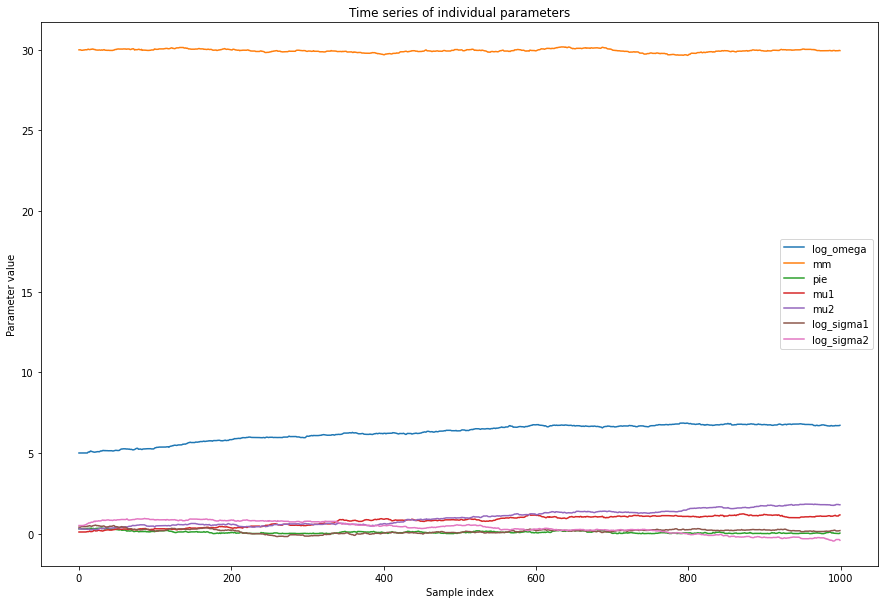

In [13]:
# parameters closer to the truth
log_omega = 5
mm = 30
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.0


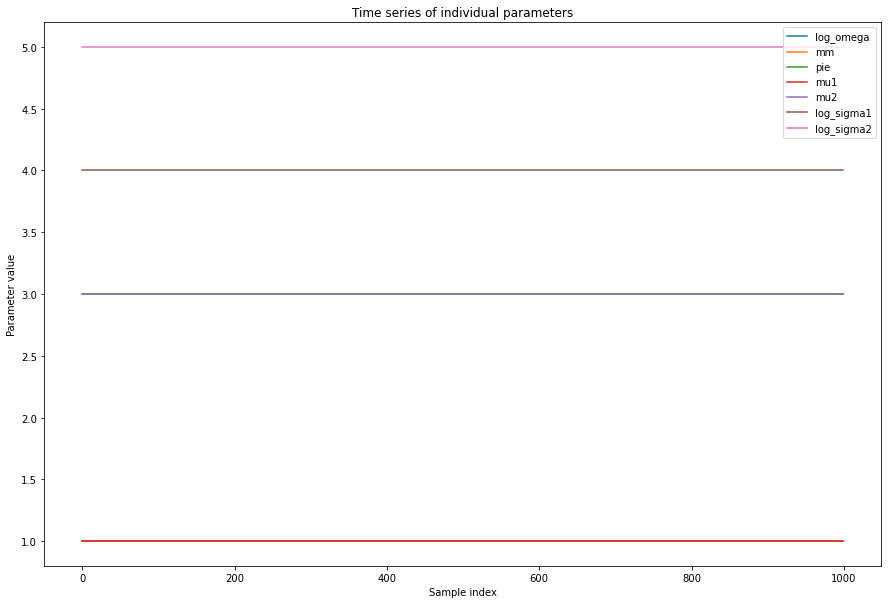

In [14]:
# different order of magnitude
log_omega = 1
mm = 1
pie = 3
mu1 = 1
mu2 = 3
log_sigma1 = 4
log_sigma2 = 5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.505


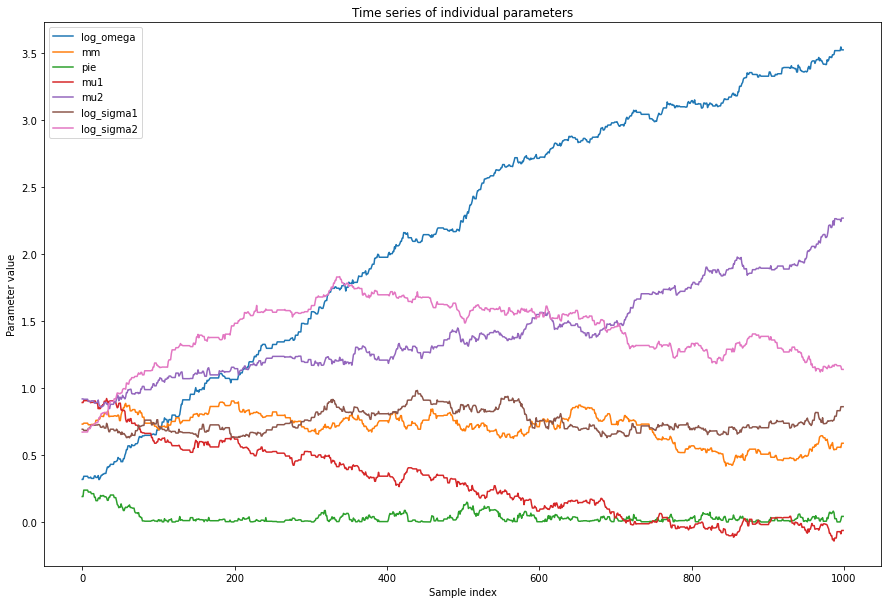

In [28]:
# random between 0 and 1
log_omega = np.random.rand()
mm = np.random.rand()
pie = np.random.rand()
mu1 = np.random.rand()
mu2 = np.random.rand()
log_sigma1 = np.random.rand()
log_sigma2 = np.random.rand()

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.018,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

0.572


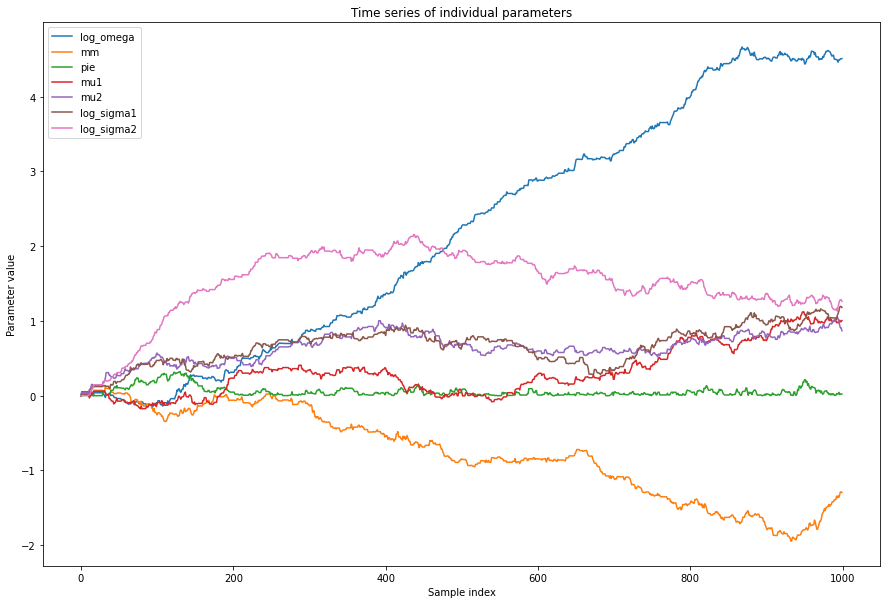

In [27]:
# all zeroes
log_omega = 0
mm = 0
pie = 0
mu1 = 0
mu2 = 0
log_sigma1 = 0
log_sigma2 = 0

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples, acceptance_rate = dumb_metropolis(params,
                                           my_func,
                                           1000,
                                           0.025,
                                           )
print(acceptance_rate)

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

## Slice sampling

Iteration 999     


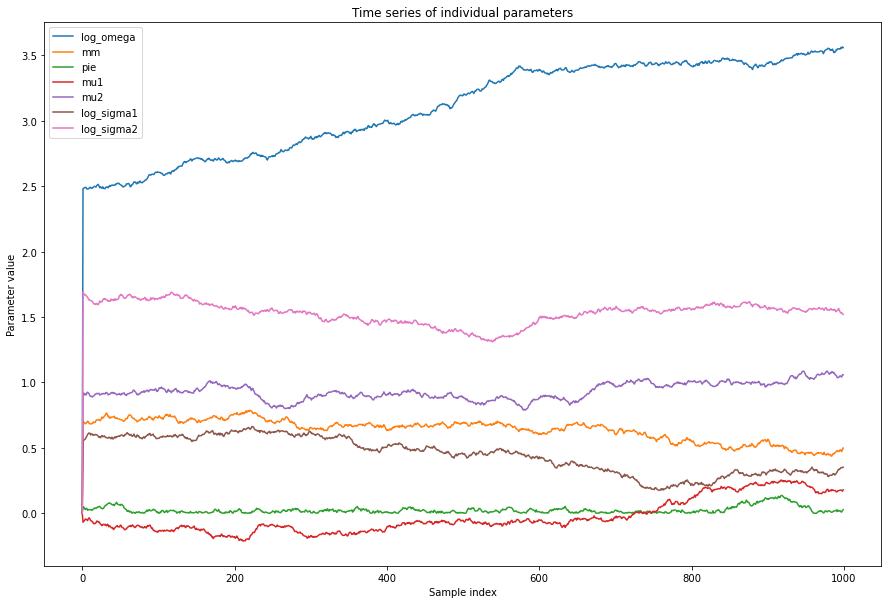

In [17]:
log_omega = 1
mm = 1
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       1000,
                       my_func,
                       params,
                       0.018,
                       False,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

Iteration 999     


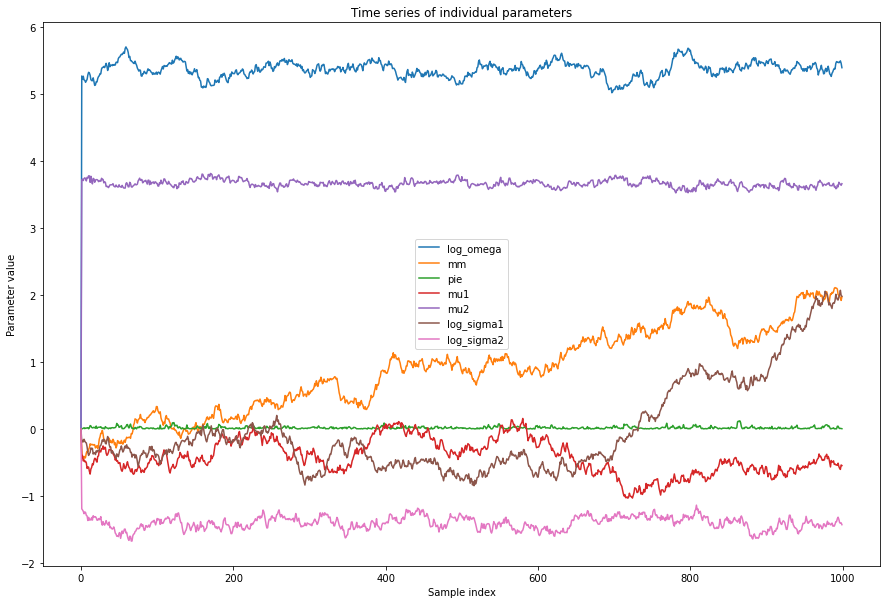

In [18]:
log_omega = np.random.rand()
mm = np.random.rand()
pie = np.random.rand()
mu1 = np.random.rand()
mu2 = np.random.rand()
log_sigma1 = np.random.rand()
log_sigma2 = np.random.rand()

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       1000,
                       my_func,
                       params,
                       0.1,
                       False,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

Iteration -987   

g:\git\bayesian-ml\hw3files\murray.py:54: RuntimeWarning: divide by zero encountered in log
  + (1 - pie) * norm(log_A, mu2, sigma2)))


Iteration 999    


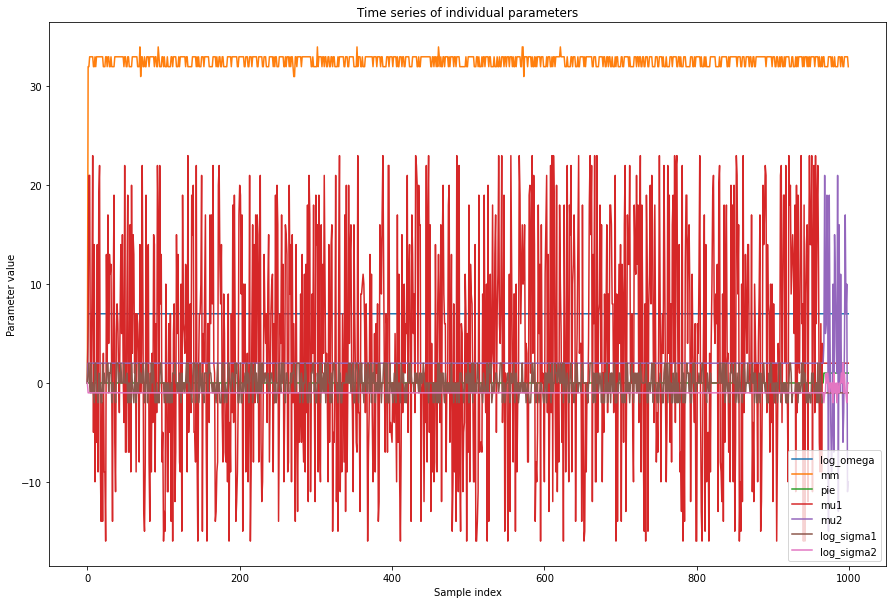

In [19]:
log_omega = 0
mm = 0
pie = 0
mu1 = 0
mu2 = 0
log_sigma1 = 0
log_sigma2 = 0

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       1000,
                       my_func,
                       params,
                       10,
                       True,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

Iteration 999     


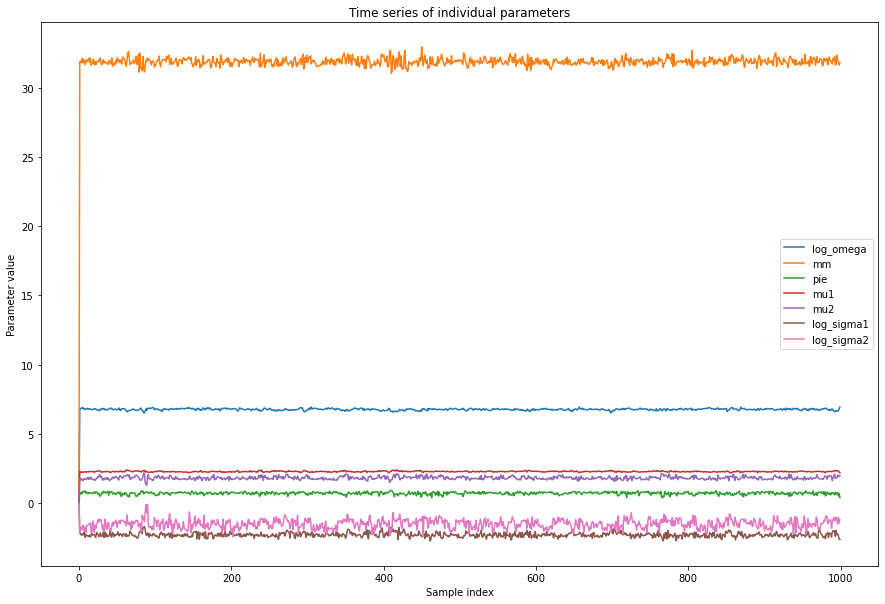

In [26]:
# random but different order of magnitude
log_omega = np.random.rand() * 3
mm = np.random.rand() * 3
pie = np.random.rand() * 3
mu1 = np.random.rand() * 3
mu2 = np.random.rand() * 3
log_sigma1 = np.random.rand() * 3
log_sigma2 = np.random.rand() * 3

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       1000,
                       my_func,
                       params,
                       1,
                       True,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

Iteration 999     


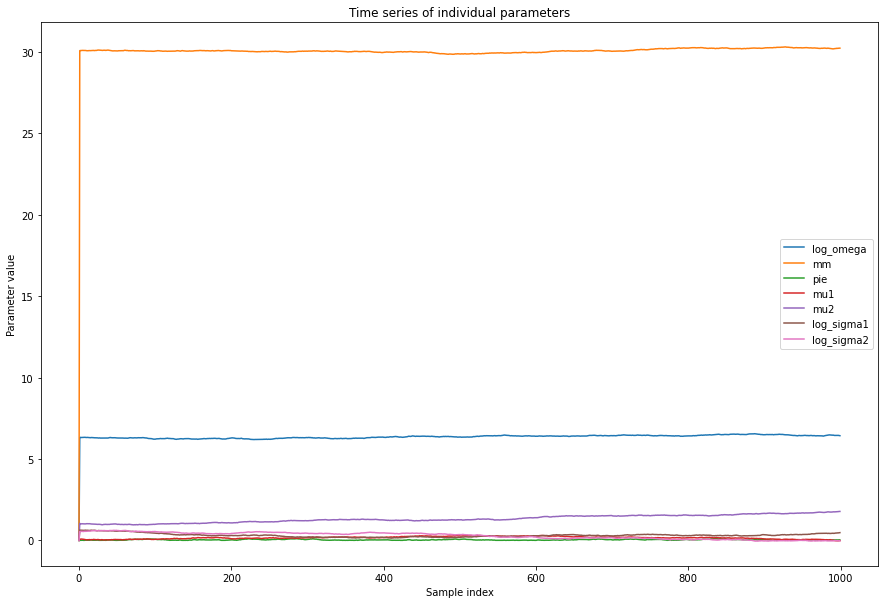

In [21]:
log_omega = 5
mm = 30
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       1000,
                       my_func,
                       params,
                       0.018,
                       False,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index

plt.figure(figsize=(15, 10))

for col in columns:
    sns.lineplot(x='sample_idx', y=col, data=df, label=col)
plt.legend(loc='best')
plt.title('Time series of individual parameters')
plt.ylabel('Parameter value')
plt.xlabel('Sample index');

In [22]:
# what are the mean values for m/omega?
df['mm'].mean(), df['log_omega'].mean()

(30.058533058227454, 6.361927862122153)

# Posteriors for $\omega$ and $m$

Iteration 999      


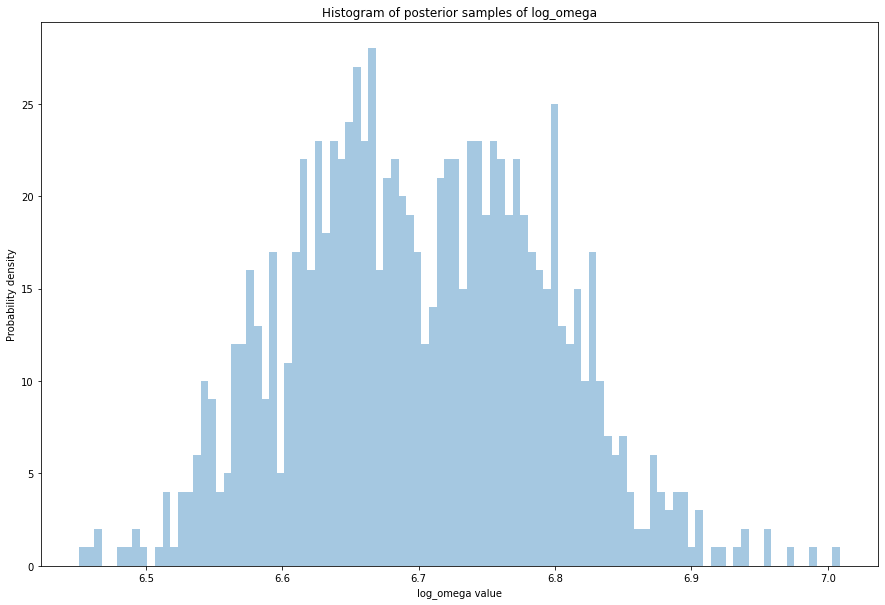

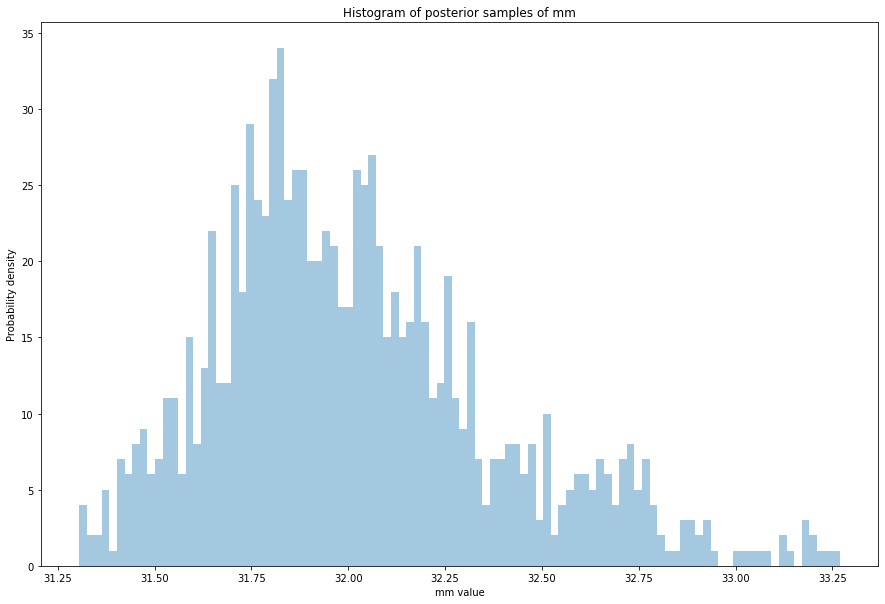

In [31]:
#starting from some low numbers just to see what happens

log_omega = 1
mm = 1
pie = 0.3
mu1 = 0.1
mu2 = 0.3
log_sigma1 = 0.4
log_sigma2 = 0.5

params = np.array([log_omega,
                   mm,
                   pie,
                   mu1,
                   mu2,
                   log_sigma1,
                   log_sigma2,
                   ])

samples = slice_sample(1000,
                       10000,  # longer burn-in period
                       my_func,
                       params,
                       0.18,
                       False,
                       )

columns = ['log_omega', 'mm', 'pie', 'mu1', 'mu2', 'log_sigma1', 'log_sigma2']

df = pd.DataFrame(samples.T, columns=columns)
df['sample_idx'] = df.index
df.drop([0], axis=0, inplace=True)  # there's a sample at "0" for all parameters here

for col in ['log_omega', 'mm']:
    plt.figure(figsize=(15, 10))
    sns.distplot(df[col], kde=False, norm_hist=False, bins=100)
    plt.title(f'Histogram of posterior samples of {col}')
    plt.ylabel('Probability density')
    plt.xlabel(f'{col} value')
    plt.show();

In [32]:
# what mean m/omega did we get for this run?
df['mm'].mean(), df['log_omega'].mean()

(32.02085477888926, 6.702165039375548)

In [33]:
np.exp(6.702)

814.0322627132781

In [34]:
np.log(875.2)

6.774452431667717